# Wrangle and Analyze: We rate dogs ([@dog_rates](https://twitter.com/dog_rates))

Tasks in this analysis are as follows:

1. Data wrangling, which consists of:
    - Gathering data 
    - Assessing data
    - Cleaning da
2. Storing, analyzing, and visualizing your wrangled data

-----------

## Introduction

Real-world data rarely comes clean. Using Python and its libraries, we will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. we will document our wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

-------------

## Gather

Data has to be gathered from three resources:

1. The WeRateDogs Twitter archive. This file (twitter_archive_enhanced.csv) is provided to me (so could download directly).  
2. The tweet image predictions i.e., what breed of dog is present in each tweet according to a neural network. This file is hosted on a server and we have to extract it programatically.
3. Twitter API and python's tweepy library to gather each tweets retweet count and favourite count at minimum, and any additional data.

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(theme='onedork')


### 1. Gathering weratedogs twitter archive 

In [2]:
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. Gathering tweet image predictions  

In [3]:
import requests
import os 

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

200 being the http status code for request has succeeded.

You can't see it currently, but all the text in our text file (present in that url) is actually in our computers working memory right now within this response variable. It's stored in the body of response which we can access using `.content`

In [4]:
# response.content
# the above line of code gives the total file display. hence it is commented

In [5]:
with open(os.path.join(url.split('/')[-1]), mode="wb") as file:
    file.write(response.content)

In [6]:
images = pd.read_csv('image-predictions.tsv',sep='\t')
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. Gathering tweets retweets and likes count - using tweepy and twitter API  

In this project, I'll be using Tweepy to query Twitter's API for additional data beyond the data included in the WeRateDogs Twitter archive. This additional data will include retweet count and favorite count.

Some APIs are completely open, like MediaWiki (accessed via the wptools library). Others require authentication. The Twitter API is one that requires users to be authorized to use it. This means that before you can run your API querying code, you need to set up your own Twitter application. Here are the steps to do that on the Twitter site:

1. signup for a twitter acct if you don't have one.
2. setup a twitter developer account.
3. answer the required fields and confirm your email.
4. create an app in the dashboard of developer acct and answer the required fileds to create an app.
5. We can then get the API consumer keys and access tokens.

In [7]:
import creds

In [8]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [9]:
import tweepy
import creds
import time
import json

In [10]:
# Twitter API keys are saved in creds.py 

auth = tweepy.OAuthHandler(creds.consumer_key, creds.consumer_secret)
auth.set_access_token(creds.access_token, creds.access_secret)
api = tweepy.API(auth,parser=tweepy.parsers.JSONParser())

In [11]:
# match and query the data from twitter api
# only extract the data related to the tweet_id in the archive data which is provided 
# in tweet_archive_enhanced.csv

tweet_ids = archive.tweet_id.values
tweet_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149])

In [12]:
tweet_data = []
ids = []

for tweet_id in tweet_ids:
    try:
        data = api.get_status(tweet_id, tweet_mode = 'extended',
                             wait_on_rate_limit = True,
                             wait_on_rate_limit_notify = True)
        tweet_data.append(data)
        ids.append(tweet_id)
        print(".",end=" ")
    except:
        print(tweet_id)

. . . . . . . . . . . . . . . . . . . 888202515573088257
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 873697596434513921
. . . . . 872668790621863937
. . 872261713294495745
. . . . . . . . . . . . . 869988702071779329
. . . . . . . . . . . . . 866816280283807744
. . . . . . . . . . . . . . . . . . . . . . 861769973181624320
. . . . . . . . . . . . . . . . . . . . . . . . . . 856602993587888130
. . . . . . . . . . . . . . . . . . . . . . . . . . . . 851953902622658560
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 845459076796616705
. . . . . 844704788403113984
. . . . . . 842892208864923648
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 837366284874571778
. 837012587749474308
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 829374341691346946
. . . . . . . . .

Rate limit reached. Sleeping for: 69


. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 6800554559518842

In [13]:
# store data in tweet_json.txt
with open('tweet_json.txt',mode="w") as file:
    json.dump(tweet_data, file)

In [14]:
# Loading the Twitter API data
twitter_counts = pd.read_json('tweet_json.txt')
twitter_counts['tweet_id'] = ids
twitter_counts = twitter_counts[['tweet_id', 'favorite_count', 'retweet_count']]

In [17]:
twitter_counts.to_csv('twitter_api_data.csv',index=False)

In [22]:
twitter_counts = pd.read_csv('twitter_api_data.csv')
twitter_counts = twitter_counts.drop('Unnamed: 0',axis=1)

In [24]:
twitter_counts.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,36240,7714
1,892177421306343426,31250,5700
2,891815181378084864,23530,3779
3,891689557279858688,39523,7869
4,891327558926688256,37734,8485


---

## Assess

The dataset may have two kinds of issues:
1. Quality issues
2. Tidiness issues
    

#### Quality Issues

*The four main data quality dimensions are:*

- *Completeness: missing data?*
- *Validity: does the data make sense?*
- *Accuracy: inaccurate data? (wrong data can still show up as valid)*
- *Consistency: standardization?*

#### Tidiness Issues

*Three requirements for tidiness:*
- *Each variable forms a column*
- *Each observation forms a row*
- *Each type of observational unit forms a table*


In [354]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [355]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [356]:
twitter_counts

,tweet_id,favorite_count,retweet_count
0,892420643555336193,36240,7714
1,892177421306343426,31250,5700
2,891815181378084864,23530,3779
3,891689557279858688,39523,7869
4,891327558926688256,37734,8485
5,891087950875897856,19006,2841
6,890971913173991426,11069,1851
7,890729181411237888,61048,17211
8,890609185150312448,26172,3917
9,890240255349198849,29887,6702


In [25]:
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1504,691820333922455552,NaN,NaN,2016-01-26 03:09:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brockly. He's an uber driver. Falls as...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691820333...,8,10,Brockly,None,None,None,None
1850,675740360753160193,NaN,NaN,2015-12-12 18:13:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper licking in slow motion. 12/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675740360...,12,10,None,None,None,pupper,None
882,760290219849637889,NaN,NaN,2016-08-02 01:44:48 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Rocco. He's doing his best. 13/10 some...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760290219...,13,10,Rocco,None,None,None,None
1342,704819833553219584,NaN,NaN,2016-03-02 00:05:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chesterson. He's a Bolivian Scoop Dog....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704819833...,7,10,Chesterson,None,None,None,None
330,833124694597443584,NaN,NaN,2017-02-19 01:23:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gidget. She's a spy pupper. Stealthy a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833124694...,12,10,Gidget,None,None,pupper,None


In [26]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [31]:
archive.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Oliver           11
Lucy             11
Penny            10
Tucker           10
Lola             10
Bo                9
Winston           9
the               8
Sadie             8
Daisy             7
Buddy             7
Toby              7
an                7
Bailey            7
Bella             6
Rusty             6
Milo              6
Jax               6
Jack              6
Dave              6
Scout             6
Oscar             6
Koda              6
Stanley           6
Leo               6
Sammy             5
               ... 
Georgie           1
Glenn             1
Cal               1
Bruno             1
Yukon             1
Durg              1
Chevy             1
Odin              1
Julius            1
Milky             1
Vinscent          1
Alexanderson      1
Stephanus         1
Tommy             1
Carter            1
Jarod             1
Banditt           1
Timber            1
Zuzu              1


In [37]:
archive[archive.name == 'None']['name'].count()

745

In [39]:
archive.rating_numerator.sort_values(ascending=False)

979     1776
313      960
189      666
188      420
2074     420
1120     204
290      182
902      165
1779     144
1634     143
1635     121
1228      99
1843      88
433       84
1254      80
695       75
340       75
1351      60
1202      50
1274      45
1433      44
763       27
1712      26
516       24
1663      20
55        17
285       15
291       15
83        14
866       14
        ... 
2183       3
1314       3
1928       3
765        3
2202       3
1692       3
1478       3
1898       3
1249       3
2305       3
2079       2
2326       2
2349       2
2237       2
2246       2
1920       2
1761       2
2310       2
1764       2
1940       1
2038       1
2091       1
1869       1
1446       1
605        1
2338       1
2261       1
2335       1
1016       0
315        0
Name: rating_numerator, Length: 2356, dtype: int64

In [41]:
archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [46]:
images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1384,765719909049503744,https://pbs.twimg.com/media/CqBiMAgWAAEJKgI.jpg,1,golden_retriever,0.969518,True,Labrador_retriever,0.021696,True,Border_terrier,0.002075,True
328,672068090318987265,https://pbs.twimg.com/media/CVOqW8eUkAESTHj.jpg,1,pug,0.863385,True,shopping_cart,0.125746,False,Border_terrier,0.002972,True
1404,769695466921623552,https://pbs.twimg.com/media/Cq6B8V6XYAA1T1R.jpg,1,pug,0.407117,True,muzzle,0.165638,False,kuvasz,0.045837,True
1834,836989968035819520,https://pbs.twimg.com/media/C52V7PzWcAA_pVv.jpg,1,shopping_cart,0.572422,False,shopping_basket,0.414002,False,toy_poodle,0.005887,True
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True


In [47]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [48]:
images.img_num.unique()

array([1, 4, 2, 3])

In [49]:
images.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [53]:
images.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [54]:
images.p2.unique()

array(['collie', 'miniature_pinscher', 'malinois', 'redbone',
       'Rottweiler', 'English_springer', 'mud_turtle', 'Tibetan_mastiff',
       'shopping_basket', 'komondor', 'Yorkshire_terrier',
       'English_foxhound', 'bull_mastiff', 'German_shepherd', 'Shih-Tzu',
       'Newfoundland', 'cock', 'desk', 'toy_terrier', 'toy_poodle',
       'otter', 'Chesapeake_Bay_retriever', 'Siberian_husky', 'skunk',
       'Afghan_hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker_spaniel', 'chow', 'Irish_terrier', 'chain_saw', 'beagle',
       'giant_schnauzer', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'Weimaraner', 'slug', 'Brittany_spaniel', 'standard_schnauzer',
       'teddy', 'armadillo', 'African_hunting_dog', 'vizsla', 'doormat',
       'pug', 'Italian_greyhound', 'Samoyed', 'Pomeranian',
       'miniature_poodle', 'Lakeland_terrier', 'Irish_setter', 'swab',
       'malamute', 'bath_towel', 'Border_collie', 'Leonberg', 'drake',
       'French_bulldog', 'ice_bear', 

In [55]:
images.p3.unique()

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese',
       'Ibizan_hound', 'French_bulldog', 'malinois', 'Dandie_Dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'Eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat-coated_retriever', 'gar', 'Chihuahua',
       'Shih-Tzu', 'Pomeranian', 'dingo', 'power_drill', 'Saluki',
       'Great_Pyrenees', 'West_Highland_white_terrier', 'collie',
       'toy_poodle', 'vizsla', 'acorn', 'giant_schnauzer', 'teddy',
       'common_iguana', 'wig', 'water_buffalo', 'coyote', 'seat_belt',
       'kelpie', 'space_heater', 'Brabancon_griffon', 'standard_poodle',
       'beagle', 'Irish_water_spaniel', 'bluetick', 'Weimaraner',
       'Chesapeake_Bay_retriever', 'toilet_tiss

In [57]:
images.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [58]:
twitter_counts.sample(5)

,tweet_id,favorite_count,retweet_count
495,811744202451197953,7691,1636
519,807010152071229440,13338,3950
2261,667174963120574464,234,74
2020,671520732782923777,1345,505
1082,734787690684657664,12489,6249


In [59]:
twitter_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
tweet_id          2328 non-null int64
favorite_count    2328 non-null int64
retweet_count     2328 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


### Quality Issues:

**`archive`** table:
- tweet_id is an int
- timestamp is an object and retweeted_status_timestamp is also an object
- name column has dog names with None, a, an.
- html tags in source column which have link of source
- this dataset includes retweets, which means there is duplicated data (as a result, these columns will be empty: retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp)
- missing data in many columns
- rating_denominator has values other than 10
- rating_numerator should have decimal values ( for example record 40 has rating 13.5 which is mentioned in data as 5)

**`images`** table:
- tweet_id is an int
- p1, p2 and p3 columns have multiword dog breeds with (- or _ )
- p1, p2 and p3 columns have names sometimes with lower case and other times sentence case.

### Tidiness Issues:

- last four columns in archive table belong to the same variable.
- unwanted columns or duplicate columns for retweets data in archive table.
- all the three dataframes belong to the same observational unit. so merge into one.

----

## Clean

In [372]:
## make copies of the dataframes
archive_clean = archive.copy()
images_clean = images.copy()
counts_clean = twitter_counts.copy()

### 1. Unwanted columns or duplicate columns for retweets data in archive table.

**Define** : drop the columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id,in_reply_to_user_id, expanded_urls.

In [373]:
# code and test
drop_columns = ['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
                'retweeted_status_timestamp', 'expanded_urls']

In [374]:
archive_clean = archive_clean.drop(drop_columns,axis=1)

In [375]:
# test
archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


### 2. Last four columns in archive table belong to same variable

**Define** : create a new column called dog_type and store the type. drop the last four columns.

In [376]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [377]:
archive_clean.shape

(2356, 11)

In [378]:
# code
archive_clean['dog_type'] = archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [379]:
archive_clean = archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

In [380]:
# test
archive_clean.shape

(2356, 8)

In [381]:
archive_clean.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_type
1547,689280876073582592,2016-01-19 02:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Herald. He wants you to know he could ...,10,10,Herald,NaN
1283,708711088997666817,2016-03-12 17:47:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Smokey. He really likes tennis balls. ...,11,10,Smokey,NaN
332,832769181346996225,2017-02-18 01:50:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @EmilieGambril: 12/10 h*cking excited about...,12,10,None,NaN
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,NaN
946,752568224206688256,2016-07-11 18:20:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here are three doggos completely misjudging an...,9,10,None,doggo
1677,682059653698686977,2015-12-30 04:44:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tess. Her main passions are shelves an...,11,10,Tess,NaN
1850,675740360753160193,2015-12-12 18:13:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper licking in slow motion. 12/10 ...,12,10,None,pupper
1773,678255464182861824,2015-12-19 16:47:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jessifer. She is a Bismoth Teriyaki. F...,9,10,Jessifer,NaN
1314,706901761596989440,2016-03-07 17:58:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Elliot. He's blocking the roadway. Dow...,3,10,Elliot,NaN
1568,687818504314159109,2016-01-15 02:08:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",With great pupper comes great responsibility. ...,12,10,None,pupper


### 3. All the dataframes belong to same observational unit.

**Define**: merge all the three data frames into a single data frame.

In [382]:
# code

# we can merge multiple dataframes into a single dataframe by using functools.
from functools import reduce

In [383]:
df = [archive_clean,images_clean,counts_clean]
weratedogs = reduce(lambda left,right: pd.merge(left,right, on='tweet_id'), df)

The above code has been understood and referred from https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns

In [384]:
# test
weratedogs.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_type,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,36240,7714
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,31250,5700


In [385]:
weratedogs.shape

(2056, 21)

In [386]:
weratedogs.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_type', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'favorite_count', 'retweet_count'],
      dtype='object')

In [387]:
weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 21 columns):
tweet_id              2056 non-null int64
timestamp             2056 non-null object
source                2056 non-null object
text                  2056 non-null object
rating_numerator      2056 non-null int64
rating_denominator    2056 non-null int64
name                  2056 non-null object
dog_type              334 non-null object
jpg_url               2056 non-null object
img_num               2056 non-null int64
p1                    2056 non-null object
p1_conf               2056 non-null float64
p1_dog                2056 non-null bool
p2                    2056 non-null object
p2_conf               2056 non-null float64
p2_dog                2056 non-null bool
p3                    2056 non-null object
p3_conf               2056 non-null float64
p3_dog                2056 non-null bool
favorite_count        2056 non-null int64
retweet_count         2056 non-null int64


---

### 4. Erroneous datatypes ( tweet_id)

**Define** : convert tweet_id from int64 to string(object) using astype.

In [388]:
# code

weratedogs['tweet_id'] = weratedogs['tweet_id'].astype(str)

In [389]:
# test
weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 21 columns):
tweet_id              2056 non-null object
timestamp             2056 non-null object
source                2056 non-null object
text                  2056 non-null object
rating_numerator      2056 non-null int64
rating_denominator    2056 non-null int64
name                  2056 non-null object
dog_type              334 non-null object
jpg_url               2056 non-null object
img_num               2056 non-null int64
p1                    2056 non-null object
p1_conf               2056 non-null float64
p1_dog                2056 non-null bool
p2                    2056 non-null object
p2_conf               2056 non-null float64
p2_dog                2056 non-null bool
p3                    2056 non-null object
p3_conf               2056 non-null float64
p3_dog                2056 non-null bool
favorite_count        2056 non-null int64
retweet_count         2056 non-null int64

### 5. Erroneous datatypes ( timestamp )

**Define** : convert timestamp from object(string) to datetime using to_datetime

In [390]:
# code

# remove the last 5 digits from timestamp 
# those digits depict timezone

weratedogs.timestamp = weratedogs.timestamp.str.slice(0,-6)

In [391]:
weratedogs.timestamp.head(2)

0    2017-08-01 16:23:56
1    2017-08-01 00:17:27
Name: timestamp, dtype: object

In [392]:
# now convert to datetime
weratedogs.timestamp = pd.to_datetime(weratedogs.timestamp, format = "%Y-%m-%d %H:%M:%S")
# its must to mention the format because there are somevalues which turn to Nan if not mentioned

In [393]:
# test

weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 21 columns):
tweet_id              2056 non-null object
timestamp             2056 non-null datetime64[ns]
source                2056 non-null object
text                  2056 non-null object
rating_numerator      2056 non-null int64
rating_denominator    2056 non-null int64
name                  2056 non-null object
dog_type              334 non-null object
jpg_url               2056 non-null object
img_num               2056 non-null int64
p1                    2056 non-null object
p1_conf               2056 non-null float64
p1_dog                2056 non-null bool
p2                    2056 non-null object
p2_conf               2056 non-null float64
p2_dog                2056 non-null bool
p3                    2056 non-null object
p3_conf               2056 non-null float64
p3_dog                2056 non-null bool
favorite_count        2056 non-null int64
retweet_count         2056 non-nu

### 6. name column has faulty names 

**Define** : gather all the faulty names present in the name column and replace those names with None

In [394]:
weratedogs.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_type,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
1957,667766675769573376,2015-11-20 18:09:16,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Calvin. He is a Luxembourgian Mayo. Ha...,9,10,Calvin,NaN,https://pbs.twimg.com/media/CURiQMnUAAAPT2M.jpg,1,...,0.883493,False,tow_truck,0.074734,False,jeep,0.012773,False,421,204
1287,689557536375177216,2016-01-19 21:18:22,"<a href=""http://twitter.com/download/iphone"" r...",Downright majestic af 12/10 https://t.co/WFh2F...,12,10,None,NaN,https://pbs.twimg.com/media/CZHM60BWIAA4AY4.jpg,1,...,0.169482,True,Siberian_husky,0.161655,True,dingo,0.154414,False,2037,455
1439,680473011644985345,2015-12-25 19:39:43,"<a href=""http://twitter.com/download/iphone"" r...",This is Hector. He thinks he's a hammer. Silly...,10,10,Hector,pupper,https://pbs.twimg.com/media/CXGGlzvWYAArPfk.jpg,1,...,0.796694,True,West_Highland_white_terrier,0.138709,True,Norwich_terrier,0.016253,True,2537,739
1435,680609293079592961,2015-12-26 04:41:15,"<a href=""http://twitter.com/download/iphone"" r...",This is Brody. That is his chair. He loves his...,9,10,Brody,NaN,https://pbs.twimg.com/media/CXICiB9UwAE1sKY.jpg,1,...,0.700764,True,Chihuahua,0.072390,True,American_Staffordshire_terrier,0.039619,True,2629,697
983,717421804990701568,2016-04-05 18:41:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Ebby. She's a Zimbabwean Feta. Embarra...,9,10,Ebby,NaN,https://pbs.twimg.com/media/CfTLUYWXEAEkyES.jpg,2,...,0.286479,True,Italian_greyhound,0.084134,True,beagle,0.064697,True,3140,841


In [395]:
# code

# it has been observed that all the names which are faulty start with lower case letters
# whereas names which aren't faulty start with upper case letters.

names_fault = weratedogs[weratedogs['name'].str.islower() == True]['name'].unique()
names_fault

array(['such', 'a', 'quite', 'one', 'incredibly', 'an', 'very', 'just',
       'my', 'not', 'his', 'getting', 'this', 'unacceptable', 'all',
       'infuriating', 'the', 'actually', 'by', 'officially', 'light',
       'space'], dtype=object)

In [396]:
for names in names_fault:
    weratedogs['name'].replace(names,'None',inplace=True)

In [397]:
# test

weratedogs[weratedogs['name'].str.islower() == True]['name'].unique()

array([], dtype=object)

### 7. source column has html tags and links  

**Define** : Extract the text related to source (name of source) from the link

In [398]:
weratedogs.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2016
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [399]:
# code
weratedogs.source = weratedogs.source.str.extract(r'>\s*([^\.]*)\s*\<', expand=False)

In [400]:
#test
weratedogs.source.value_counts()

Twitter for iPhone    2016
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

In [401]:
weratedogs.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'],
      dtype=object)

In [402]:
weratedogs.sample(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_type,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
1685,672984142909456390,2015-12-05 03:41:37,Twitter for iPhone,Very happy pup here. Always smiling. Loves his...,9,10,None,NaN,https://pbs.twimg.com/media/CVbrcZyVAAA5Wpq.jpg,1,...,0.738780,False,beaver,0.133368,False,wallaby,0.032370,False,1216,521
1108,704871453724954624,2016-03-02 03:30:25,Twitter for iPhone,I found a forest Pipsy. 12/10 https://t.co/mIQ...,12,10,None,NaN,https://pbs.twimg.com/media/Ccg02LiWEAAJHw1.jpg,1,...,0.689504,True,soft-coated_wheaten_terrier,0.101480,True,Norwich_terrier,0.055779,True,4258,1112


### 8. rating_denominator has values other than 10

**Define** : assign all the values in rating_denominator to 10

In [403]:
# code
weratedogs.rating_denominator = 10

In [404]:
# test
weratedogs.rating_denominator.value_counts()

10    2056
Name: rating_denominator, dtype: int64

In [405]:
weratedogs.rating_denominator.unique()

array([10])

## 9. Standardize dog ratings ( Decimal ratings are present)

**Define** : convert the rating_numerator and rating_denominator columns to float. Then iterate through the dataset (text) and find the records having decimal rating in numerator. store the indices and the decimal rating and relocate these values with faulty values.

In [406]:
# code

weratedogs['rating_numerator'] = weratedogs['rating_numerator'].astype(float)
weratedogs['rating_denominator'] = weratedogs['rating_denominator'].astype(float)

In [407]:
weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 21 columns):
tweet_id              2056 non-null object
timestamp             2056 non-null datetime64[ns]
source                2056 non-null object
text                  2056 non-null object
rating_numerator      2056 non-null float64
rating_denominator    2056 non-null float64
name                  2056 non-null object
dog_type              334 non-null object
jpg_url               2056 non-null object
img_num               2056 non-null int64
p1                    2056 non-null object
p1_conf               2056 non-null float64
p1_dog                2056 non-null bool
p2                    2056 non-null object
p2_conf               2056 non-null float64
p2_dog                2056 non-null bool
p3                    2056 non-null object
p3_conf               2056 non-null float64
p3_dog                2056 non-null bool
favorite_count        2056 non-null int64
retweet_count         2056 no

In [408]:
# code

import re

ratings_text = []
ratings_index = []
ratings = []

# For loop to gather all text, indices, and ratings for tweets that contain a decimal in the numerator of the rating
for i, text in weratedogs['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_text.append(text)
        ratings_index.append(i)
        ratings.append(re.search('\d+\.\d+', text).group())

# Print ratings with decimals        
ratings_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [409]:
ratings_index

[40, 548, 603, 1438]

In [410]:
ratings

['13.5', '9.75', '11.27', '11.26']

In [411]:
# as we can ratings are in string format, hence convert them to float

weratedogs.loc[ratings_index[0],'rating_numerator'] = float(ratings[0])
weratedogs.loc[ratings_index[1],'rating_numerator'] = float(ratings[1])
weratedogs.loc[ratings_index[2],'rating_numerator'] = float(ratings[2])
weratedogs.loc[ratings_index[3],'rating_numerator'] = float(ratings[3])

In [412]:
# test
weratedogs.loc[548]

tweet_id                                             786709082849828864
timestamp                                           2016-10-13 23:23:56
source                                               Twitter for iPhone
text                  This is Logan, the Chow who lived. He solemnly...
rating_numerator                                                   9.75
rating_denominator                                                   10
name                                                              Logan
dog_type                                                            NaN
jpg_url                 https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg
img_num                                                               1
p1                                                           Pomeranian
p1_conf                                                        0.467321
p1_dog                                                             True
p2                                                          Pers

The value for rating_numerator has now been set to correct rating value (9.75)

### 10. p1, p2 and p3 columns have multiword dog breeds with (- or _ ) instead of white spaces

**Define** : replace _,-  in p1,p2 and p3 columns with " " using str.replace() function

In [413]:
# code

weratedogs.p1 = weratedogs.p1.str.replace('_'," ")
weratedogs.p2 = weratedogs.p2.str.replace('_'," ")
weratedogs.p3 = weratedogs.p3.str.replace('_'," ")

weratedogs.p1 = weratedogs.p1.str.replace('-'," ")
weratedogs.p2 = weratedogs.p2.str.replace('-'," ")
weratedogs.p3 = weratedogs.p3.str.replace('-'," ")


In [414]:
# test

weratedogs[['p1','p2','p3']].sample(5)

,p1,p2,p3
433,malinois,German shepherd,Border terrier
1286,dogsled,cocker spaniel,Chihuahua
1889,doormat,Chihuahua,Norfolk terrier
68,basset,Welsh springer spaniel,bathtub
701,golden retriever,Sussex spaniel,Labrador retriever


### 11. p1, p2 and p3 columns have breeds some times with lowercase and other times with sentence case

**Define** : use str.capitalize() method to convert all the values of p1,p2 and p3 columns to sentence case

In [415]:
# code

weratedogs.p1 = weratedogs.p1.str.capitalize()
weratedogs.p2 = weratedogs.p2.str.capitalize()
weratedogs.p3 = weratedogs.p3.str.capitalize()

In [416]:
# test

weratedogs[['p1','p2','p3']].sample(5)

,p1,p2,p3
187,Staffordshire bullterrier,American staffordshire terrier,Pug
1079,Bernese mountain dog,Shetland sheepdog,Appenzeller
180,Malamute,Siberian husky,Eskimo dog
912,Polecat,Mink,Newfoundland
1208,Samoyed,Arctic fox,White wolf


### 12. Create a new dog_breed column to store the breed of dog

**Define** : Iterate through each row of the dataframe using iterrows() function and then select the dogbreed from p1, p2 and p3 columns using boolean indexing from p1_dog , p2_dog , p3_dog

In [417]:
# code

weratedogs['dog_breed'] = ""
for ind, row in weratedogs.iterrows():
    if row['p1_dog']:
        weratedogs.at[ind,'dog_breed'] = row.p1
    elif row['p2_dog']:
        weratedogs.at[ind,'dog_breed'] = row.p2
    elif row['p3_dog']:
        weratedogs.at[ind,'dog_breed'] = row.p3
    else:
        weratedogs.at[ind,'dog_breed'] = 'None'



The above code has been referred and unserstood from https://stackoverflow.com/questions/23330654/update-a-dataframe-in-pandas-while-iterating-row-by-row

In [418]:
# test
weratedogs.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_type,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_breed
208,842115215311396866,2017-03-15 20:48:07,Twitter for iPhone,This is Bentley. It's his first time going to ...,12.0,10.0,Bentley,NaN,https://pbs.twimg.com/media/C6_LTCZWoAAKm_O.jpg,1,...,True,Newfoundland,0.181336,True,Schipperke,0.125152,True,13935,3014,Chow
1217,695051054296211456,2016-02-04 01:07:39,Twitter for iPhone,"Meet Brian (pronounced ""Kirk""). He's not amuse...",6.0,10.0,Brian,NaN,https://pbs.twimg.com/media/CaVRP4GWwAERC0v.jpg,1,...,True,Pug,0.075395,True,Chihuahua,0.041598,True,2657,784,Boston bull
1425,681193455364796417,2015-12-27 19:22:30,Twitter for iPhone,This is Aspen. He's astronomically fluffy. I w...,11.0,10.0,Aspen,NaN,https://pbs.twimg.com/media/CXQV03pWYAAVniz.jpg,1,...,True,Keeshond,0.004356,True,Schipperke,0.000814,True,3687,1474,Pomeranian
720,758740312047005698,2016-07-28 19:06:01,Twitter for iPhone,Meet Boston. He's worried because his tongue w...,12.0,10.0,Boston,NaN,https://pbs.twimg.com/media/CoeWSJcUIAAv3Bq.jpg,1,...,True,Labrador retriever,0.110054,True,Curly coated retriever,0.025201,True,5774,1620,Chesapeake bay retriever
369,816336735214911488,2017-01-03 17:33:39,Twitter for iPhone,This is Dudley. He found a flower and now he's...,11.0,10.0,Dudley,NaN,https://pbs.twimg.com/media/C1Q17WdWEAAjKFO.jpg,1,...,True,Kuvasz,0.049480,True,Golden retriever,0.011934,True,8748,1980,Labrador retriever


In [419]:
weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 22 columns):
tweet_id              2056 non-null object
timestamp             2056 non-null datetime64[ns]
source                2056 non-null object
text                  2056 non-null object
rating_numerator      2056 non-null float64
rating_denominator    2056 non-null float64
name                  2056 non-null object
dog_type              334 non-null object
jpg_url               2056 non-null object
img_num               2056 non-null int64
p1                    2056 non-null object
p1_conf               2056 non-null float64
p1_dog                2056 non-null bool
p2                    2056 non-null object
p2_conf               2056 non-null float64
p2_dog                2056 non-null bool
p3                    2056 non-null object
p3_conf               2056 non-null float64
p3_dog                2056 non-null bool
favorite_count        2056 non-null int64
retweet_count         2056 no

### 13. Drop unwanted columns ( img_num)

**Define** : drop img_num column from weratedogs dataframe

In [420]:
# code
weratedogs = weratedogs.drop('img_num',axis=1)

In [421]:
# test
weratedogs.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_type', 'jpg_url', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'favorite_count', 'retweet_count', 'dog_breed'],
      dtype='object')

-----

## Storing , Analysing and visualising data

This part provides analyis of the dataset and required corresponding visualisations to draw valuable conclusions

In [422]:
# storing the cleaned data to twitter_archive_master.csv
weratedogs.to_csv('twitter_archive_master.csv', encoding = 'utf-8' , index=False)

### 1. Which is the most popular dog breed?

In [423]:
popular_breeds = weratedogs.groupby('dog_breed').filter(lambda x: len(x)>= 25)
popular_breeds.dog_breed.value_counts()

None                        321
Golden retriever            173
Labrador retriever          110
Pembroke                     95
Chihuahua                    93
Pug                          65
Toy poodle                   51
Chow                         51
Samoyed                      45
Pomeranian                   42
Malamute                     34
Cocker spaniel               33
Chesapeake bay retriever     31
French bulldog               30
Miniature pinscher           26
Name: dog_breed, dtype: int64

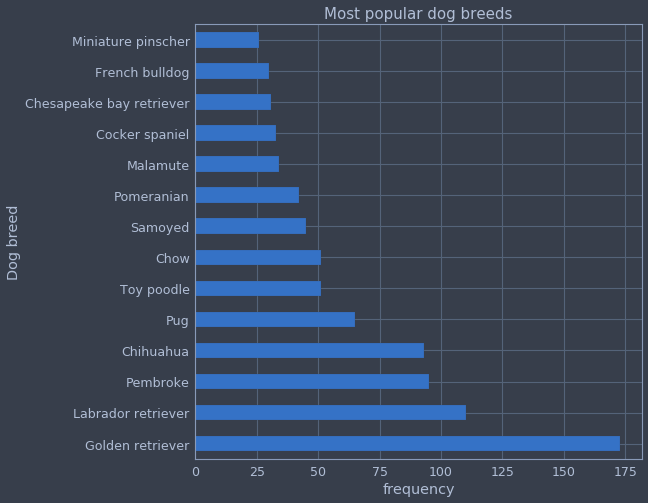

In [424]:
popular_breeds['dog_breed'].value_counts()[1:].plot(kind='barh',figsize=(8,8))
plt.title("Most popular dog breeds",fontsize=15)
plt.ylabel("Dog breed")
plt.xlabel("frequency");


Golden retriever is the most popular dog breed.

### 2. What is the relationship between number of retweets and favorites

In [425]:
weratedogs[['favorite_count','retweet_count']].sample(10)

,favorite_count,retweet_count
1581,6097,2504
214,12273,969
1640,1720,1180
1675,12993,7572
1467,21132,7962
1947,789,450
884,10223,4441
140,15032,3321
1223,4139,2029
713,8555,2470


In [426]:
weratedogs['favorite_count'].corr(weratedogs['retweet_count'])

0.8619741194125379

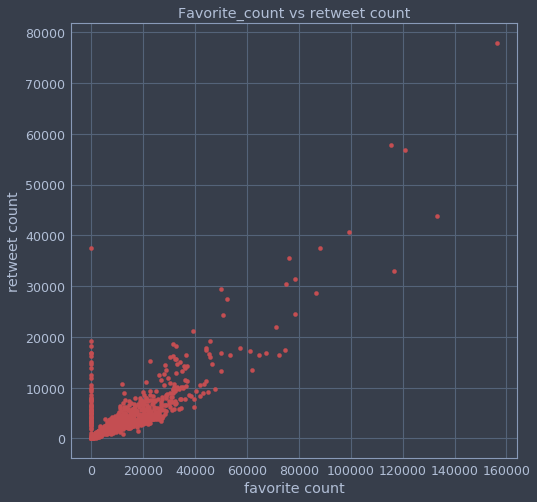

In [427]:
weratedogs.plot(x='favorite_count', y='retweet_count',figsize=(8,8), kind = 'scatter', c='r')
plt.title('Favorite_count vs retweet count')
plt.xlabel('favorite count')
plt.ylabel('retweet count');

Hence from above graph we can say that there is a positive correlation between favorite_count and retweet_count with a correlation coefficient of 0.86 which means there exits a **`strong positive correlation`**.

### 3. Which dog breeds have most number of retweets

In [428]:
breeds = weratedogs[['dog_breed','retweet_count']]
breed_retweet = breeds.groupby('dog_breed').sum()

In [429]:
breed_retweet.describe()

,retweet_count
count,114.000000
mean,46706.833333
std,103382.427455
min,394.000000
25%,6252.250000
50%,15912.500000
75%,36472.250000
max,750331.000000


In [430]:
breed_retweet = breed_retweet[breed_retweet.retweet_count > breed_retweet.retweet_count.mean()]

In [431]:
breed_retweet = breed_retweet.drop('None')

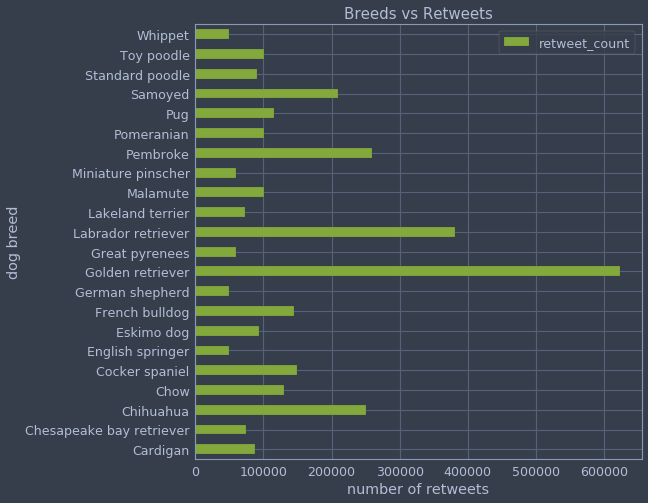

In [432]:
breed_retweet.plot(kind= 'barh',figsize = (8,8), color='g')
plt.xlabel('number of retweets')
plt.ylabel('dog breed')
plt.title('Breeds vs Retweets', fontsize = 15);

The most retweeted dog breed is Golden retriever, with Labrador retriever the next most and pembroke later

### 4. Which dog breeds have most number of favorites ( likes )

In [433]:
breeds = weratedogs[['dog_breed','favorite_count']]
breed_favorite = breeds.groupby('dog_breed').sum()

In [434]:
breed_favorite = breed_favorite[breed_favorite.favorite_count > breed_favorite.favorite_count.mean()]

In [435]:
breed_favorite = breed_favorite.drop('None')

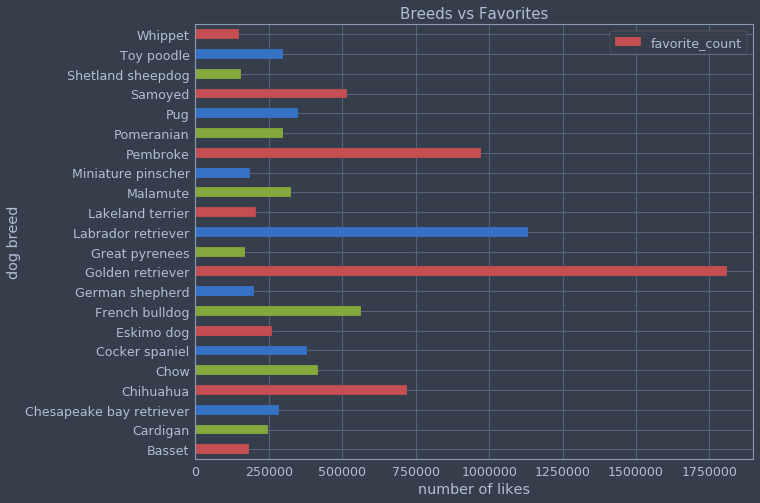

In [436]:
breed_favorite.plot(kind= 'barh',figsize = (10,8), color='rgb')
plt.xlabel('number of likes')
plt.ylabel('dog breed')
plt.title('Breeds vs Favorites', fontsize = 15);

`Golden retriever breed has highest number of likes, with Labrador retriever next most.`

### 5. What are the most popular dog names

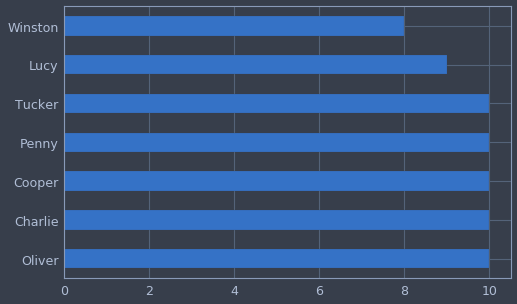

In [437]:
weratedogs.name.value_counts()[1:8].plot(kind = 'barh',figsize=(8,5), color= 'b')

The most popular dog names are Oliver, Cooper, Charlie, Tucker and Penny for a tie at 10 each.

----

## Insights 

1. Golden retriever is the most popular dog breed.
2. correlation between favorite_count and retweet_count with a correlation coefficient of 0.86 which means there exits a **`strong positive correlation`**
3. The most retweeted dog breed is Golden retriever, with Labrador retriever the next most and pembroke later
4. `Golden retriever breed has highest number of likes, with Labrador retriever next most.`
5. The most popular dog names are Oliver, Cooper, Charlie, Tucker and Penny for a tie at 10 each.